### Column Details
* fixed acidity: Concentration of fixed acids like tartaric acid in g/dm³.
* volatile acidity: Amount of acetic acid, which affects the wine's aroma, in g/dm³.
* citric acid: Citric acid concentration, adds freshness to wine, in g/dm³.
* residual sugar: Remaining sugar after fermentation, in g/dm³.
* chlorides: Amount of salt in the wine, in g/dm³.
* free sulfur dioxide: Free SO₂ to prevent microbial growth and oxidation, in mg/dm³.
* total sulfur dioxide: Sum of free and bound forms of SO₂, in mg/dm³.
* density: Relative density of the wine compared to water.
* pH: Measure of acidity or alkalinity.
* sulphates: Potassium sulphate content, contributes to wine preservation, in g/dm³.
* alcohol: Alcohol content by volume (%).
* quality: Quality score assigned by tasters, on a scale from 0 to 10.

In [1]:
# Importing important libraries and loading the data.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#reading red wine type
red = pd.read_csv(r"/content/winequality-red.csv", sep=';')
#reading red wine type
white = pd.read_csv(r"/content/winequality-white.csv", sep=';')

In [2]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [3]:
print(red.head())
print(white.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

* We can see that the red wine has 1599 records and white wine type has 4898 record.
* We can also see that the columns of red and white wines are exactly same so we can combine it for easier understanding.
* For our understanding we will make another column and assign them as 0 to white wine type and 1 to red wine type and consider that as the target features.
* This step helps us to aligns with our main goal of predicting the wine type.


In [4]:
# Assigning red type as 1 and white as 0
red['type'] = 1
white['type'] = 0
print(red.head())
print(white.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

In [5]:
# combining the dataset
df = pd.concat([red, white], ignore_index=True)

In [6]:
df.shape

(6497, 13)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


* luckily we have no null values.

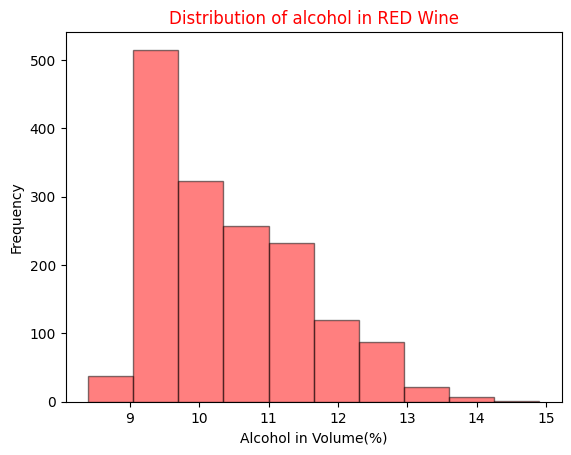

In [11]:
plt.hist(red['alcohol'], 10, facecolor = 'red', ec="black", alpha = 0.5, label='Red Wine')
plt.xlabel("Alcohol in Volume(%)")
plt.ylabel("Frequency")
plt.title("Distribution of alcohol in RED Wine", color="red")
plt.show()

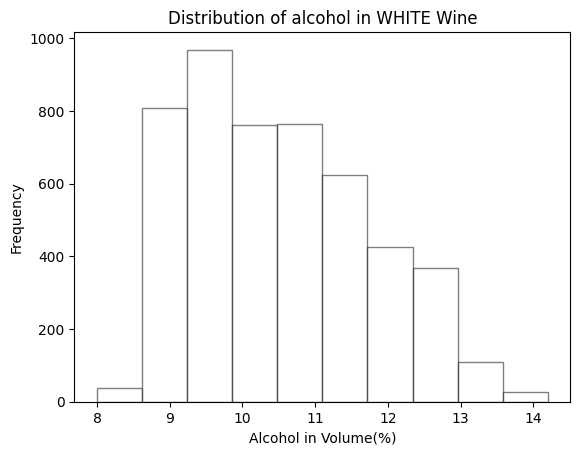

In [12]:
plt.hist(white['alcohol'], 10, facecolor = 'white',ec="black", alpha = 0.5, label='Red Wine')
plt.title("Distribution of alcohol in WHITE Wine")
plt.xlabel("Alcohol in Volume(%)")
plt.ylabel("Frequency")
plt.show()

In [27]:
# feature extraction

x = df.drop('type', axis = 1)
y = np.ravel(df['type'])
x.shape, y.shape

((6497, 12), (6497,))

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4352, 12), (2145, 12), (4352,), (2145,))

In [28]:
#Model building
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,)))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.output_shape
model.summary()
model.get_config()
model.get_weights()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=1)


Epoch 1/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8814 - loss: 1.2809
Epoch 2/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9402 - loss: 0.1686
Epoch 3/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9492 - loss: 0.1437


In [33]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, model.predict(x_test)))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.039015032351017


In [34]:
from sklearn.metrics import r2_score

print(r2_score(y_test, model.predict(x_test)))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
0.7970538139343262


From above metrics we can conclude the above model is a good fit model.

Thank you for going through my work till the end, feel free to get in touch if you have any doubts... :)